In [1]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import ipywidgets as widgets
style = {'description_width': 'initial'}

#Creating lists for Unique UCs, Words, East/West Universities, and for ALL universities
unique_ucs = ['UC Berkeley', 'UCLA', 'UC San Diego','UC Davis','UC Irvine','UC Santa Barbara', 'UC Riverside','UC Merced', 'UC Santa Cruz']
unique_words = ['Death','Failure','Help','Afraid', 'Anxiety', 'Scared','Lonely','Stressed','Happy','Good','Depressed']
unique_east =  ['Cornell','Harvard','NYU','MIT', 'Yale','Princeton']
unique_west = ['UC Berkeley', 'UCLA', 'UC San Diego','UC Davis','UC Irvine','UC Santa Barbara', 'UC Riverside','UC Merced', 'UC Santa Cruz']
unique_all = ['UC Berkeley', 'UCLA', 'UC San Diego', 'UC Merced',
       'UC Santa Cruz', 'UC Santa Barbara', 'UC Riverside', 'UC Davis',
       'UC Irvine', 'Stanford', 'MIT', 'Yale', 'Princeton', 'Cornell',
       'Harvard', 'NYU']

#Creating list of two results of TextBlob ML Sentiment Scoring
score_names = ['Polarity', 'Subjectivity']

from ipywidgets import Layout

#Creating Widgets for East Universities (can select multiple)
eastuniversity = widgets.SelectMultiple(
    options =unique_east,
    value = ['Cornell','Harvard','NYU','MIT'],
    #rows=10,
    description='East Coast',
    disabled=False,
    layout = Layout(width='50%', height='80px')
)

#Creating Widgets for UCs (can select multiple)
university = widgets.SelectMultiple(
    options =['UC Berkeley', 'UCLA', 'UC San Diego','UC Davis','UC Irvine','UC Santa Barbara', 'UC Riverside','UC Merced', 'UC Santa Cruz'],
    value = ['UC Berkeley', 'UCLA', 'UC San Diego','UC Davis','UC Irvine','UC Santa Barbara', 'UC Riverside','UC Merced', 'UC Santa Cruz'],
    #rows=10,
    description='UC',
    disabled=False,
    layout = Layout(width='50%', height='80px')
)

#Creating Widgets for TextBlob Results
scores = widgets.SelectMultiple(
    options = ['Polarity', 'Subjectivity'],
    value = ['Polarity', 'Subjectivity'],
    #rows=10,
    description='Score Type',
    disabled=False,
    layout = Layout(width='50%', height='80px')
)

#Creating Widgets for All Universities (can select multiple)
all_universities = widgets.SelectMultiple(
    options = ['UC Berkeley', 'UCLA', 'UC San Diego', 'UC Merced',
       'UC Santa Cruz', 'UC Santa Barbara', 'UC Riverside', 'UC Davis',
       'UC Irvine', 'Stanford', 'MIT', 'Yale', 'Princeton', 'Cornell',
       'Harvard', 'NYU'],
    value = ['UC Berkeley', 'UCLA', 'UC San Diego', 'UC Merced',
       'UC Santa Cruz', 'UC Santa Barbara', 'UC Riverside', 'UC Davis',
       'UC Irvine', 'Stanford', 'MIT', 'Yale', 'Princeton', 'Cornell',
       'Harvard', 'NYU'],
    #rows=10,
    description='University Name',
    disabled=False,
    layout = Layout(width='50%', height='80px')
)

#Creating Widgets for Words (can select multiple)
words = widgets.SelectMultiple(
    options = unique_words,
    value = ['Death','Failure','Help'],
    description='Mental Health Keyword',
    disabled=False,
    style=style,
    layout = Layout(width='50%', height='80px')
)
from ipywidgets import interact, interact_manual

## Explore each UC Individually

In [3]:
@interact_manual
#Function to create interactive plots to analyze each UC individually
def exploreUCdata(University = unique_ucs, Word = unique_words):
    df = pd.read_csv('ucuniversity.csv')
    df = df.set_index('Publish Date')
    fig, ax = plt.subplots(figsize=(18,8))
    df1 = df.loc[df['University'] == University]
    ax.plot(df1[Word], label= University);
    fig.autofmt_xdate();
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d');
    ax.set_title(Word + " " + 'Frequency Per UC');
    ax.legend(loc='upper right');

interactive(children=(Dropdown(description='University', options=('UC Berkeley', 'UCLA', 'UC San Diego', 'UC D…

## Compare UCs

In [4]:
@interact_manual
#Function to create interactive plots to compare various UCs
def UCcompare(University = university, Word = unique_words):
    df = pd.read_csv('ucuniversity.csv')
    df = df.set_index('Publish Date')
    fig, ax = plt.subplots(figsize=(18,8))
    for i in np.arange(len(University)):
        df1 = df.loc[df['University'] == University[i]]
        ax.plot(df1[Word], label= University[i]);
    ax.set_title(Word + " " + 'Frequency Per UC');
    fig.autofmt_xdate();
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d');
    ax.legend(loc='upper right');

interactive(children=(SelectMultiple(description='UC', index=(0, 1, 2, 3, 4, 5, 6, 7, 8), layout=Layout(height…

## East Coast Universities

In [5]:
@interact_manual
#Function to create interactive plots to various East Coast Universities
def Eastcompare(University = eastuniversity, Word = unique_words):
    df = pd.read_csv('eastuniversity.csv')
    df = df.set_index('Publish Date')
    fig, ax = plt.subplots(figsize=(18,8))
    for i in np.arange(len(University)):
        df1 = df.loc[df['University'] == University[i]]
        ax.plot(df1[Word], label= University[i]);
    ax.set_title(Word + " " + 'Frequency Per East Coast University');
    fig.autofmt_xdate();
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d');
    ax.legend(loc='upper right');

interactive(children=(SelectMultiple(description='East Coast', index=(0, 1, 2, 3), layout=Layout(height='80px'…

## West vs. East Coast

In [6]:
@interact_manual
#Function to create interactive plots to analyze West vs. East Coast Universities
def westeastcompare(West = unique_west, East = unique_east, Word = unique_words):
    df = pd.read_csv('alluniversities.csv')
    df = df.set_index('Publish Date')
    fig, ax = plt.subplots(figsize=(18,8))
    
    df1 = df.loc[df['University'] == West]
    df2 = df.loc[df['University'] == East]
    
    ax.plot(df1[Word], label= West);
    ax.plot(df2[Word], label= East);
    ax.set_title(Word + " " + 'Frequency for West/East Coast Universities');
    fig.autofmt_xdate();
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d');
    ax.legend(loc='upper right');

interactive(children=(Dropdown(description='West', options=('UC Berkeley', 'UCLA', 'UC San Diego', 'UC Davis',…

## Polarity & Subjectivity Scores

In [7]:
@interact_manual
#Function to create interactive plots to analyze Polarity scores of each university over time
def exploreScoreData(University = unique_all):
    df = pd.read_csv('allunipolarity.csv')
    df["Publish Date"] = pd.to_datetime(df["Publish Date"]).astype('datetime64[M]')
    df = df.loc[df["University"] == University]
    g = sns.lineplot(data=df, x="Publish Date", y="Polarity")
    plt.xticks(rotation=30)
    plt.tight_layout()

interactive(children=(Dropdown(description='University', options=('UC Berkeley', 'UCLA', 'UC San Diego', 'UC M…

In [8]:
@interact_manual
#Function to create interactive plots to analyze Subjectivity scores of each university over time
def exploreScoreData(University = unique_all):
    df = pd.read_csv('allunipolarity.csv')
    df["Publish Date"] = pd.to_datetime(df["Publish Date"]).astype('datetime64[M]')
    df = df.loc[df["University"] == University]
    g = sns.lineplot(data=df, x="Publish Date", y="Subjectivity", color="red")
    plt.xticks(rotation=30)
    plt.tight_layout()

interactive(children=(Dropdown(description='University', options=('UC Berkeley', 'UCLA', 'UC San Diego', 'UC M…

In [9]:
polaritydf = pd.read_csv('allunipolarity.csv')

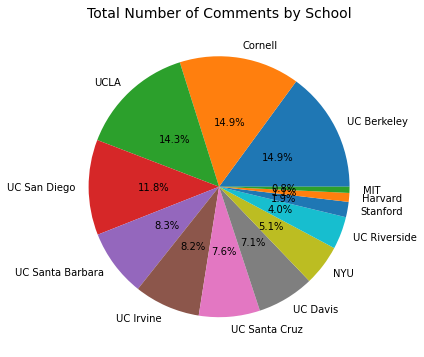

In [10]:
#Pie Chart of total number of comments to see which school has more users
data = polaritydf.groupby("University")["Total No. of Comments"].sum().sort_values(ascending=False).head(13)
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Total Number of Comments by School", fontsize=14);